# Wired-probe metadata

added to processing pipeline

```bash
sbatch cluster/processing/process_marques_silico_2023_10_18.sbatch
```

isolated pipeline:

```bash
sbatch cluster/metadata/label_vivo_silico_npx_2023_10_18.sbatch
````



In [12]:
import os
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
from probeinterface.plotting import plot_probe
from probeinterface import generate_multi_columns_probe
import MEAutility as MEA

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.study.layer import getAtlasInfo

experiment = "silico_neuropixels"
run = "2023_10_18"
data_conf, param_conf = get_config(experiment, run).values()
WIRED_RECORDING = data_conf["probe_wiring"]["output"]
BLUECONFIG = data_conf["dataeng"]["blueconfig"]

2023-12-13 11:07:04,245 - root - utils.py - get_config - INFO - Reading experiment config.
2023-12-13 11:07:04,257 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Compute site layers

In [10]:
# get site positions
Recording = si.load_extractor(WIRED_RECORDING)
probe = Recording.get_probe()
site_coord3D = probe.contact_positions

# get site layers
regionList, site_layers = getAtlasInfo(BLUECONFIG, site_coord3D)

### Plot site layers

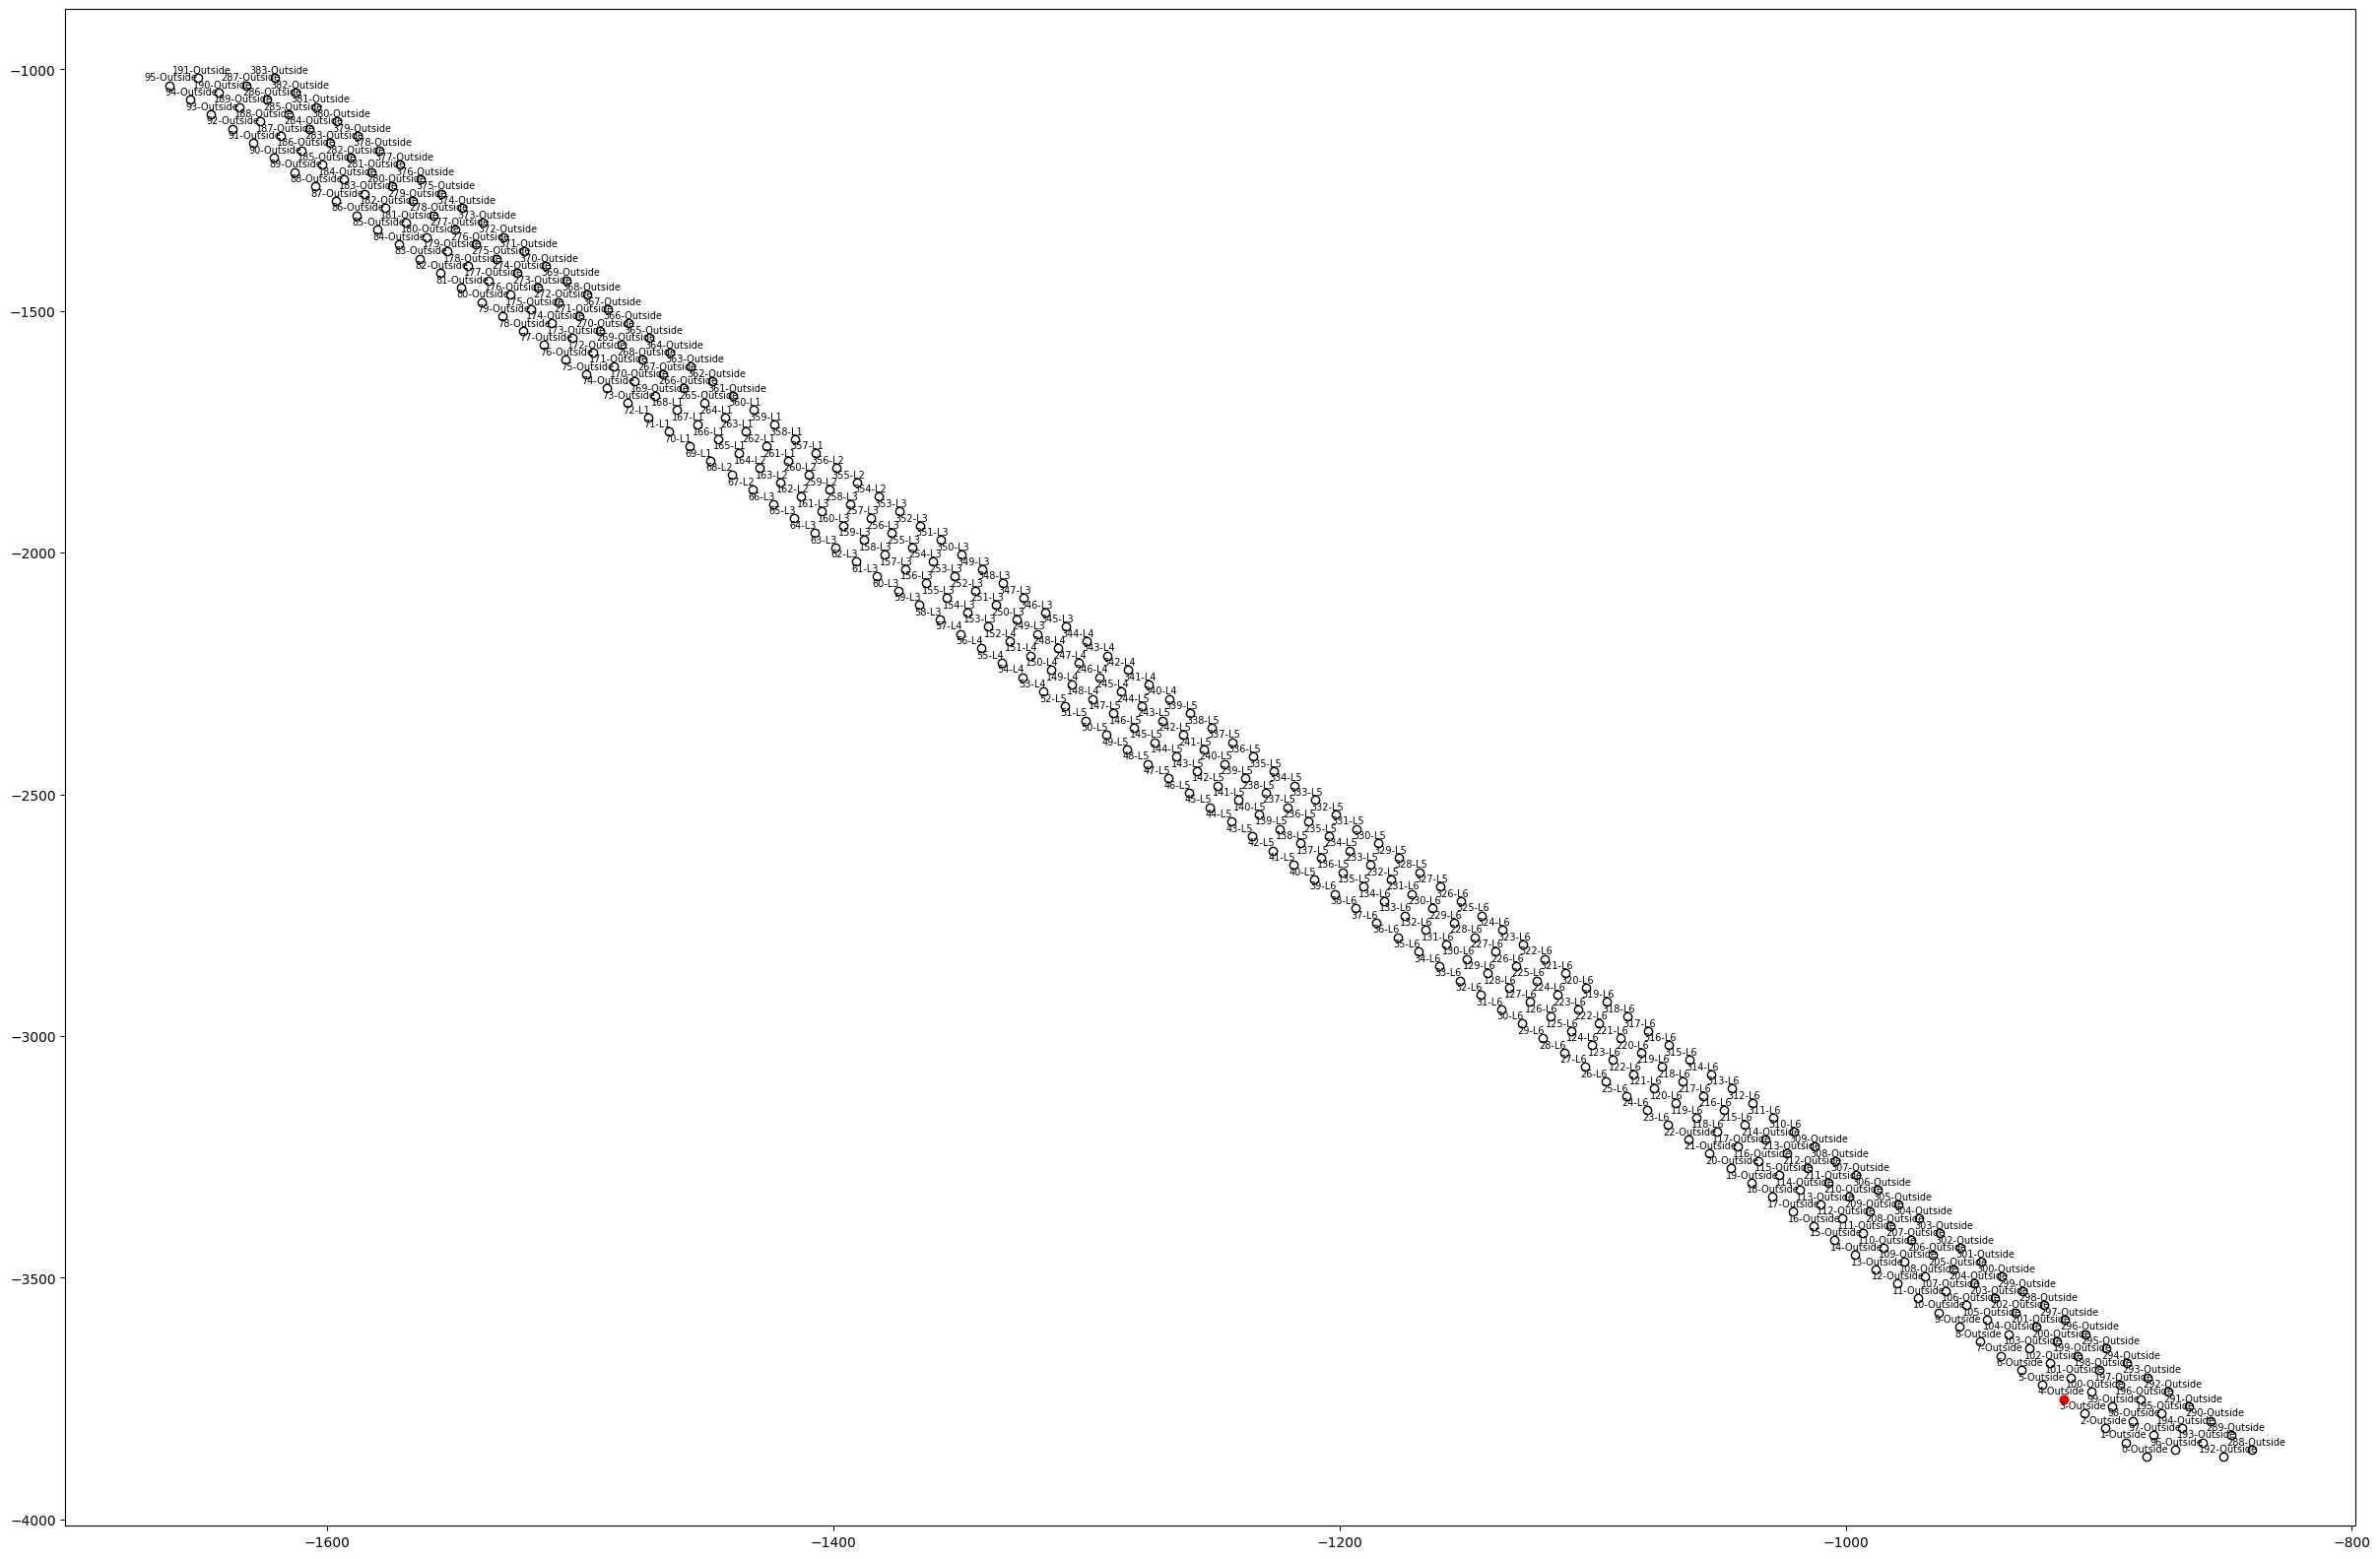

In [58]:
# plot
contact_coord = probe.contact_positions
contact_ids = probe.contact_ids

# plot file contact with ids
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

ax.plot(contact_coord[:, 1], contact_coord[:, 2], "o", markerfacecolor="w", color="k")
for ix in range(len(contact_ids)):
    ax.text(
        contact_coord[ix, 1] - 10,
        contact_coord[ix, 2] + 10,
        "%s" % (str(contact_ids[ix]) + "-" + str(site_layers[ix])),
        size=7,
        # zorder=100,
        # color="r",
        # s=1,
    )
plt.plot(contact_coord[4, 1], contact_coord[4, 2], "ro")